In [199]:
import pandas as pd
import numpy as np 
from sklearn import preprocessing, linear_model

In [200]:
#第一步: 處理空值

#導入資料

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [201]:
# 1-1 觀看資料內容

In [202]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [203]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [204]:
train.shape

(891, 12)

In [205]:
test.shape

(418, 11)

In [206]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [207]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [208]:
train.isnull().sum()  #印出表格中有出現NaN的總數

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [209]:
test.isnull().sum() #印出表格中有出現NaN的總數

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [210]:
# 視覺化處理
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set() 

In [211]:
#觀察各個項目間的關係
def bar_chart (feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind = 'bar', stacked = True, figsize = (10,5))

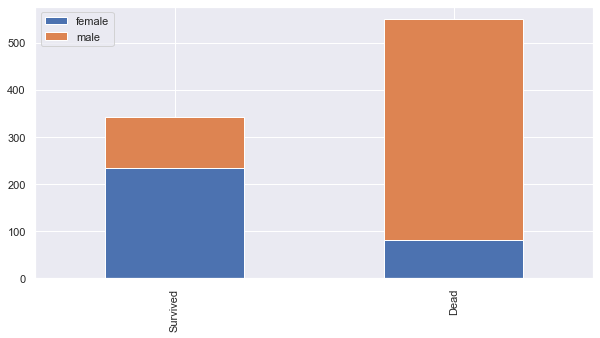

In [212]:
bar_chart('Sex') #藉由這張圖可以知道，女性存活人數比男性來的高

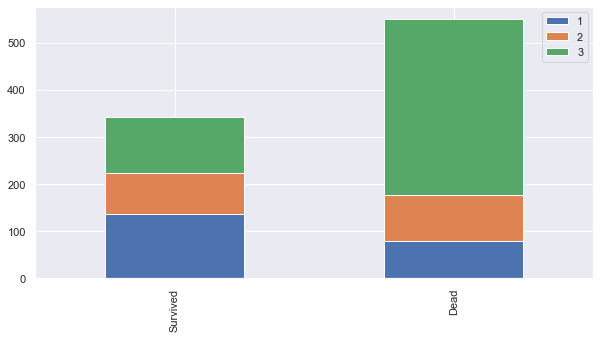

In [213]:
bar_chart('Pclass') #住在P1的旅客生還人數比死亡人數來的高 #住在P2不相上下 #住在P3的死亡人數最多，生還人數最少

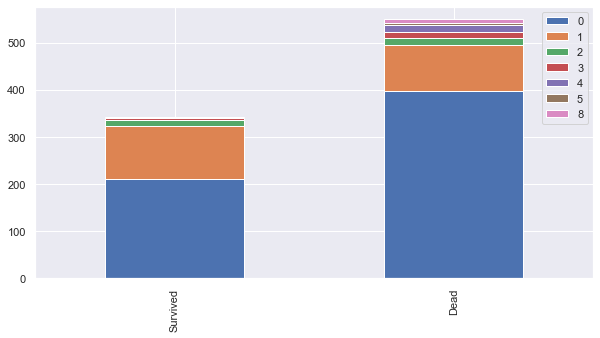

In [214]:
bar_chart('SibSp') #有手足的旅客存活率較高

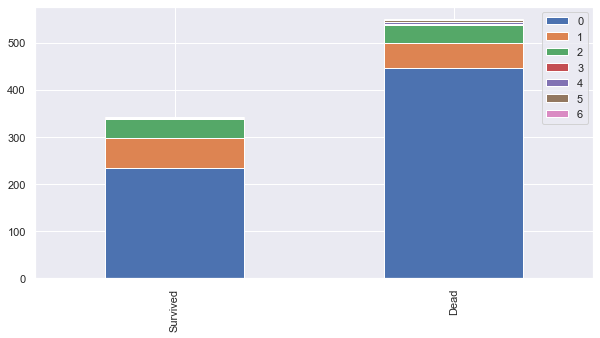

In [215]:
bar_chart('Parch') #有家屬或小孩的人生存人數較多

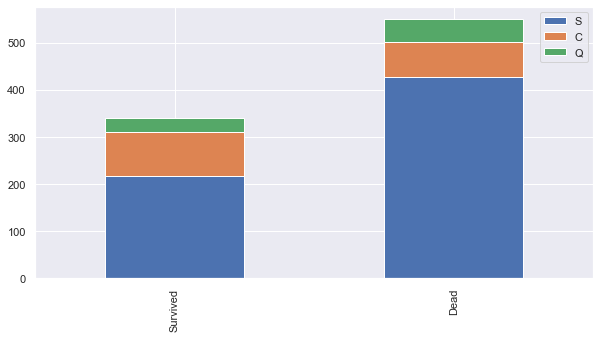

In [216]:
bar_chart('Embarked') #比較不同登船處的生存和死亡人數

In [217]:
# Feature engineering
train.head(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [218]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [219]:
#處理'Name'資料, 把其他訊息的資料，從'Name'中取出

train_test_data = [train, test] #合併

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)
# .str.extract('([A-Za-z]+)\.', expand=False) 抓出 'McCarthy, Mr. Timothy J'中的([A-Za-z]+)\.= (Mr.) 
#要注意 .

In [220]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Jonkheer      1
Countess      1
Ms            1
Mme           1
Lady          1
Sir           1
Capt          1
Don           1
Name: Title, dtype: int64

In [221]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [222]:
# Title map
# Mr:0
# Miss:1
# Mrs:2
# Others:3

title_mapping = {"Mr":0,"Miss":1,"Mrs":2,
                "Master":3, "Dr":3, "Rev":3, "Col":3, "Major":3, "Mlle":3, "Countess":3,
                "Ms":3, "Lady":3, "Jonkheer":3, "Don":3, "Dona":3, "Mme":3, "Capt":3, "Sir":3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [223]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [224]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


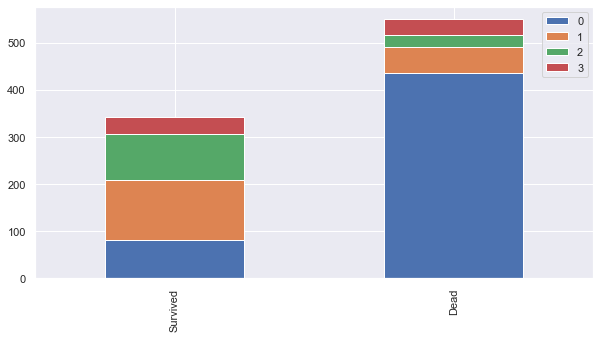

In [225]:
bar_chart('Title') #Title跟生還跟死亡的關係

In [226]:
# 把'Name'刪除

train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [227]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [228]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [229]:
# 'Sex' 轉換成0,1
# Male = 0, Female = 1

In [230]:
sex_mapping = {"male":0, "female":1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

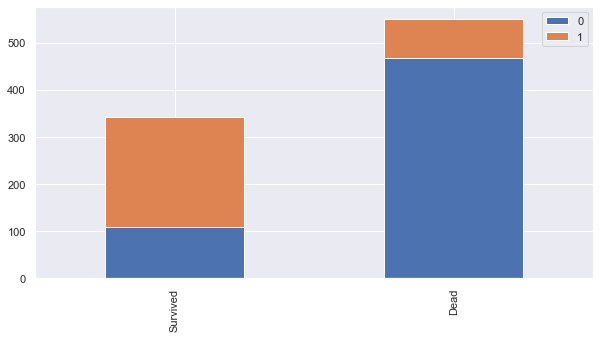

In [231]:
bar_chart('Sex')

In [232]:
#Age 
#先處理Age欄裡面的NaN
train.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,NaN,0,0,374910,8.0500,NaN,S,0
96,97,0,1,0,71.0,0,0,PC 17754,34.6542,A5,C,0
97,98,1,1,0,23.0,0,1,PC 17759,63.3583,D10 D12,C,0
98,99,1,2,1,34.0,0,1,231919,23.0000,NaN,S,2


In [233]:
#如果是Nan的資料，但是title是Mr. 這邊會用Mr.的平均年齡來填入

train['Age'].fillna(train.groupby('Title')["Age"].transform("median"), inplace = True)
test['Age'].fillna(test.groupby('Title')["Age"].transform("median"), inplace = True)

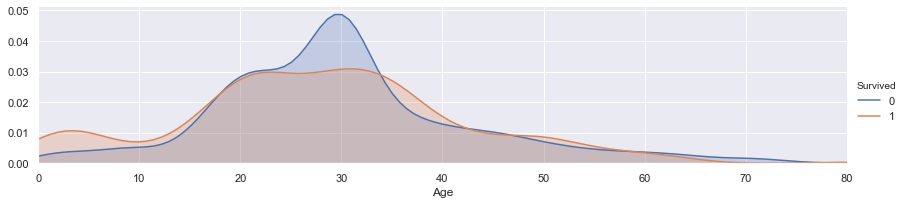

In [234]:
#視覺化
facet = sns.FacetGrid(train, hue = "Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

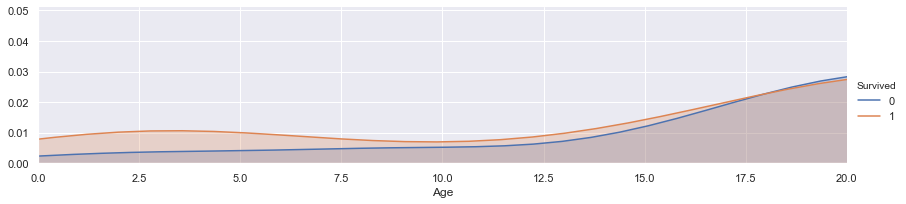

In [235]:
facet = sns.FacetGrid(train, hue = "Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0,20) #仔細觀看= 0~20歲的分佈

(20.0, 30.0)

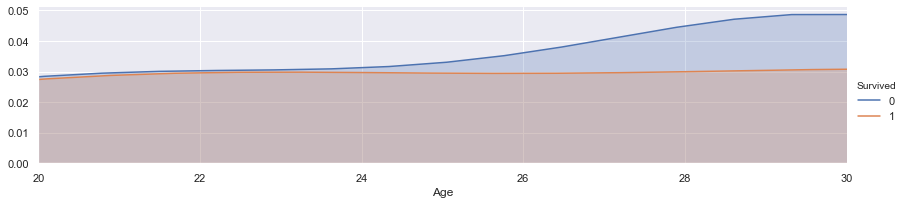

In [236]:
facet = sns.FacetGrid(train, hue = "Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20,30)

(30.0, 40.0)

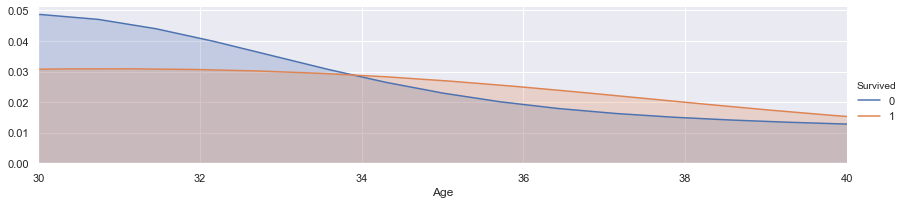

In [237]:
facet = sns.FacetGrid(train, hue = "Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30,40)

(40.0, 50.0)

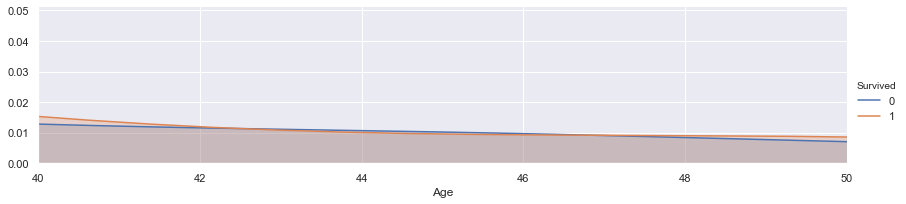

In [238]:
facet = sns.FacetGrid(train, hue = "Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40,50)

(50.0, 60.0)

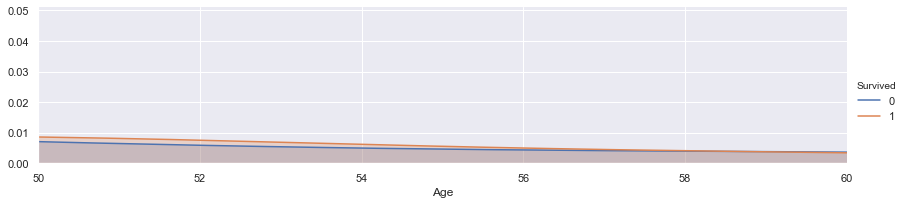

In [239]:
facet = sns.FacetGrid(train, hue = "Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(50,60)

(60.0, 80.0)

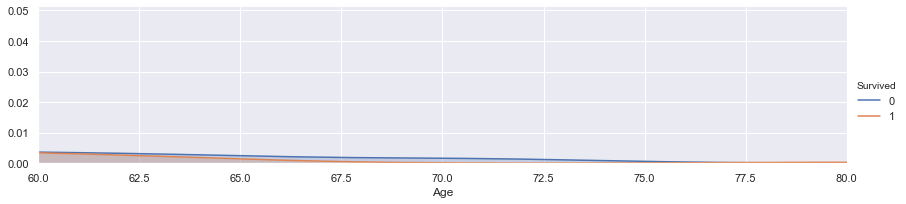

In [240]:
facet = sns.FacetGrid(train, hue = "Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(60)

In [241]:
#把年紀歸類
# child: 0
# young: 1
# adult: 2
# mid-age:3
# senior:4

In [242]:
for dataset in train_test_data:
    dataset.loc[ dataset["Age"] <= 16, 'Age'] = 0
    dataset.loc[(dataset["Age"] > 16) & (dataset["Age"] <= 26), 'Age'] = 1
    dataset.loc[(dataset["Age"] > 26) & (dataset["Age"] <= 36), 'Age'] = 2
    dataset.loc[(dataset["Age"] > 36) & (dataset["Age"] <= 62), 'Age'] = 3
    dataset.loc[ dataset["Age"] > 62, 'Age'] = 4 
   

In [243]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


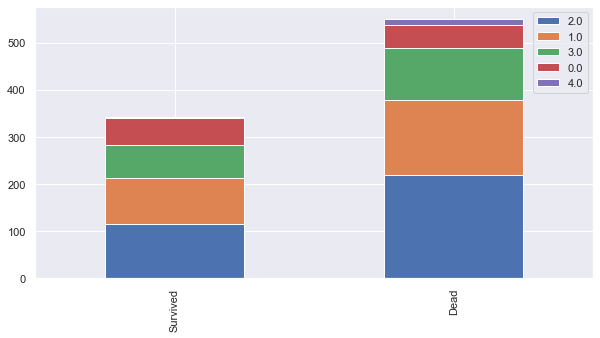

In [244]:
bar_chart("Age")

<AxesSubplot:>

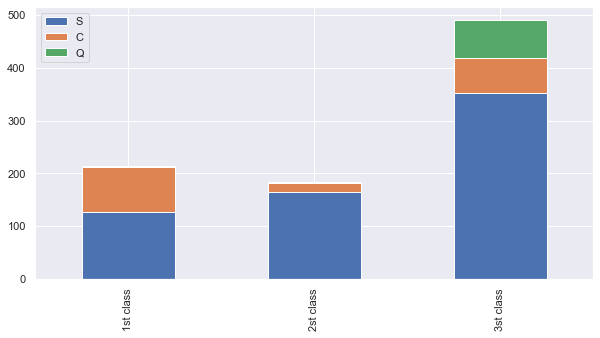

In [245]:
# Embarked 哪裡上傳的
# 這裡要比較"Embarked"和"Pclass"的關係

Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2, Pclass3])
df.index = ['1st class','2st class','3st class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [246]:
# 把NaN補滿

for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [247]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [248]:
embarked_mapping = {'S': 0, 'C':1 , 'Q':2}
for dataset in train_test_data:
    dataset["Embarked"] = dataset['Embarked'].map(embarked_mapping)

In [249]:
#Fare
#先把Nan資料填滿
# 用平均值即可，
train['Fare'].fillna(train.groupby('Pclass')["Fare"].transform("median"), inplace = True)
test['Fare'].fillna(test.groupby('Pclass')["Fare"].transform("median"), inplace = True)


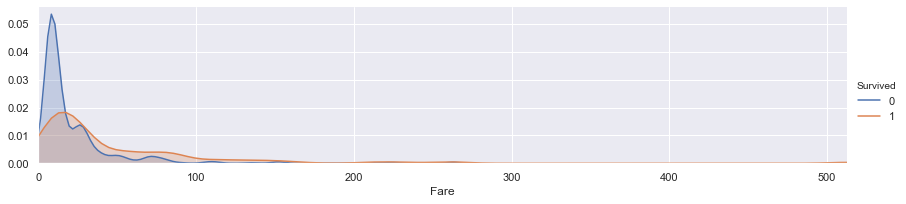

In [250]:
#視覺化
facet = sns.FacetGrid(train, hue = "Survived", aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim()

plt.show()


(0.0, 20.0)

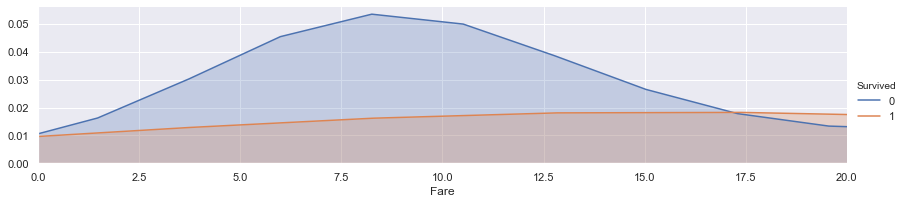

In [251]:
facet = sns.FacetGrid(train, hue = "Survived", aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0,20)


(0.0, 30.0)

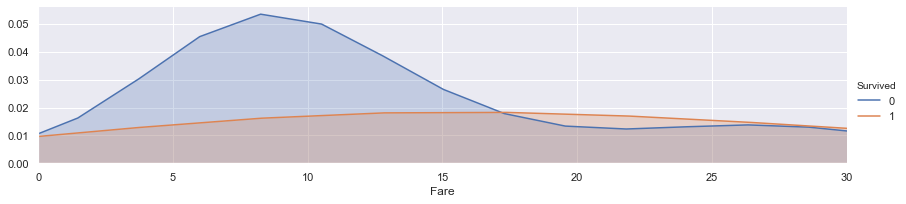

In [252]:
facet = sns.FacetGrid(train, hue = "Survived", aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0,30)

(0.0, 512.3292)

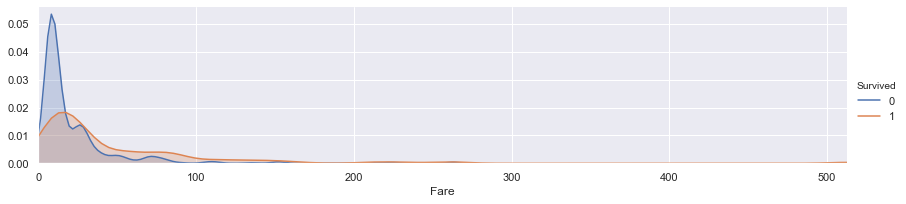

In [253]:
facet = sns.FacetGrid(train, hue = "Survived", aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0)

In [254]:
for dataset in train_test_data:
    dataset.loc[ dataset["Fare"] <= 17, 'Fare'] = 0
    dataset.loc[(dataset["Fare"] > 17) & (dataset["Fare"] <= 30), 'Fare'] = 1
    dataset.loc[(dataset["Fare"] > 30) & (dataset["Fare"] <= 100), 'Fare'] = 2
    dataset.loc[ dataset["Fare"] > 100, 'Fare'] = 3 
   

In [255]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [256]:
#Cabin
train.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
D              3
C22 C26        3
              ..
C7             1
E31            1
C148           1
E36            1
B78            1
Name: Cabin, Length: 147, dtype: int64

In [257]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1] #只要第一個字母就好，可以知道他們是住在哪一個艙位

<AxesSubplot:>

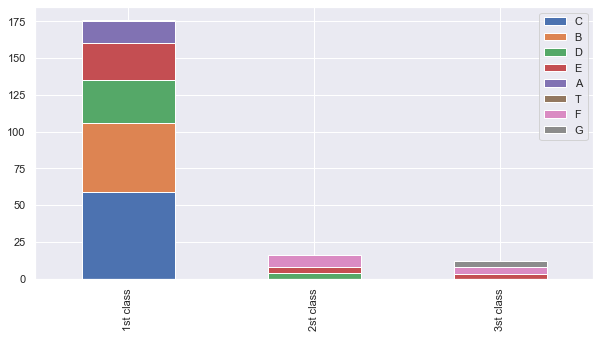

In [258]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2, Pclass3])
df.index = ['1st class','2st class','3st class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [259]:
cabin_mapping = {"A":0, "B":0.4, "C":0.8, "D":1.2, "E":1.6, "F":2, "G":2.4, "T":2.8 }
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace = True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace = True)

In [260]:
# 看看familysiez = 手足+家長

train["FamilySize"] = train["SibSp"]+train["Parch"]+1
test["FamilySize"] = test["SibSp"]+test["Parch"]+1

(0.0, 11.0)

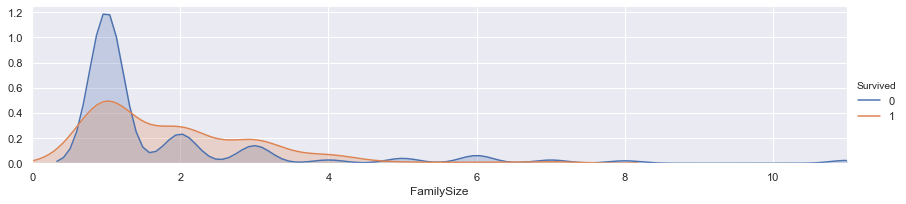

In [261]:
facet = sns.FacetGrid(train, hue = "Survived", aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [262]:
family_mapping = {1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:2, 7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [263]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [264]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [265]:
# 船票沒有提供任何訊息價值，可以刪掉

features_drop = ["Ticket", "SibSp", "Parch"]
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'],axis=1)


In [266]:
train_data =train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, traget.shape

((891, 8), (891,))

In [267]:
train_data.head(10)

#已經把資料都整理成電腦可以閱讀的樣子

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
5,3,0,2.0,0.0,2.0,2,0,0.0
6,1,0,3.0,2.0,1.6,0,0,0.0
7,3,0,0.0,1.0,2.0,0,3,1.6
8,3,1,2.0,0.0,2.0,0,2,0.8
9,2,1,0.0,2.0,1.8,1,2,0.4


In [268]:
# 開始Modelling
# 導入模型套件
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [269]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


In [270]:
# Cross Validarion (K-fold)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [271]:
#NN
clf = KNeighborsClassifier(n_neighbors=13)
scoring = "accuracy"
score = cross_val_score(clf, train_data, traget, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.76404494 0.80898876 0.83146067 0.87640449 0.82022472
 0.85393258 0.79775281 0.84269663 0.84269663]


In [272]:
round(np.mean(score)*100, 2)

82.6

In [273]:
# 決策樹 Decisiom Tree
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, traget, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.82022472 0.7752809  0.7752809  0.8988764  0.76404494
 0.83146067 0.82022472 0.74157303 0.78651685]


In [274]:
round(np.mean(score)*100, 2)

79.8

In [275]:
#隨機森林
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, traget, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.84269663 0.79775281 0.78651685 0.85393258 0.79775281
 0.80898876 0.82022472 0.75280899 0.78651685]


In [276]:
round(np.mean(score)*100, 2)

80.58

In [277]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, traget, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


In [278]:
round(np.mean(score)*100, 2)

78.78

In [279]:
#SVM
clf =SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, traget, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.79775281 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.84269663 0.86516854]


In [280]:
round(np.mean(score)*100, 2)

83.5

In [287]:
# TESTING
# SVM為最高分，所以用SVM來做測試

clf = SVC()
clf.fit(train_data, target)

test_data= test.drop('PassengerId',axis=1).copy()
prediction = clf.predict(test_data)

In [293]:
submission = pd.DataFrame({
        "PassengerId":test["PassengerId"], 
        "Survived":prediction 
     })

submission.to_csv('submission.csv', index=False)

In [294]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
